# ECG Data Preprocessing Example

This notebook demonstrates how to use the `data_preprocess.py` module for loading, cleaning, and optionally splitting ECG dataset for time series analysis. The focus is on handling null and infinite values and preparing the dataset for further analysis or model training.


In [4]:
#Import Required Libraries
import sys
# Update the path below according to your project structure
sys.path.append('../src')

import pandas as pd
import numpy as np

from data_preprocess import load_data, check_and_clean_data, preprocess_data


### Loading and Preprocessing the Dataset

In [7]:
# Path to the dataset. 
file_path_train = '../data/ecg_train.csv'
file_path_test = '../data/ecg_test.csv'

# Loading and preprocessing the training dataset
ecg_train = preprocess_data(file_path_train, sep=',', header=None, split=False)
print("Training dataset after preprocessing:")
print(ecg_train.head())

# Loading and preprocessing the testing dataset
ecg_test = preprocess_data(file_path_test, sep=',', header=None, split=False)
print("Testing dataset after preprocessing:")
print(ecg_test.head())


Removed 1 rows with null or infinite values.
Training dataset after preprocessing:
   0        1        2        3        4        5        6        7     \
0   3.0  0.39475  0.42683  0.40271  0.36694  0.40403  0.42741  0.42354   
1   2.0 -0.25097 -0.24359 -0.17080 -0.16245 -0.17461 -0.17786 -0.17280   
2   4.0  0.76671  0.77335  0.76703  0.76831  0.77436  0.77349  0.77428   
3   3.0 -0.11454 -0.12602 -0.15173 -0.18220 -0.18592 -0.18366 -0.18393   
4   3.0 -0.29191 -0.30657 -0.31069 -0.30988 -0.31269 -0.32061 -0.32349   

      8        9     ...     1630      1631      1632     1633      1634  \
0  0.45237  0.42515  ...  0.42560  0.423450  0.439390  0.45879  0.452610   
1 -0.17083 -0.17054  ... -0.23849 -0.241870 -0.244640 -0.24521 -0.243480   
2  0.77122  0.76613  ...  0.75079  0.753830  0.759440  0.76402  0.769820   
3 -0.16847 -0.15904  ... -0.02097 -0.023981 -0.037699 -0.05316 -0.049396   
4 -0.31899 -0.33060  ... -0.23937 -0.254440 -0.262070 -0.26039 -0.258970   

       1635    

In [8]:
# Check info
ecg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Columns: 1640 entries, 0 to 1639
dtypes: float64(1640)
memory usage: 2.3 MB


In [9]:
# Check info
ecg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 1640 entries, 0 to 1639
dtypes: float64(1640)
memory usage: 512.6 KB


In [10]:
# Split train dataset into 1 column for targets/classes and features
from data_preprocess import split_data

ecg_train_x, ecg_train_y = split_data(ecg_train, target_column=0, split=True)
print("Training features:")
print(ecg_train_x.head())
print("Training targets:")
print(ecg_train_y.head())

Training features:
      1        2        3        4        5        6        7        8     \
0  0.39475  0.42683  0.40271  0.36694  0.40403  0.42741  0.42354  0.45237   
1 -0.25097 -0.24359 -0.17080 -0.16245 -0.17461 -0.17786 -0.17280 -0.17083   
2  0.76671  0.77335  0.76703  0.76831  0.77436  0.77349  0.77428  0.77122   
3 -0.11454 -0.12602 -0.15173 -0.18220 -0.18592 -0.18366 -0.18393 -0.16847   
4 -0.29191 -0.30657 -0.31069 -0.30988 -0.31269 -0.32061 -0.32349 -0.31899   

      9        10    ...     1630      1631      1632     1633      1634  \
0  0.42515  0.62191  ...  0.42560  0.423450  0.439390  0.45879  0.452610   
1 -0.17054 -0.17127  ... -0.23849 -0.241870 -0.244640 -0.24521 -0.243480   
2  0.76613  0.76752  ...  0.75079  0.753830  0.759440  0.76402  0.769820   
3 -0.15904 -0.16089  ... -0.02097 -0.023981 -0.037699 -0.05316 -0.049396   
4 -0.33060 -0.33954  ... -0.23937 -0.254440 -0.262070 -0.26039 -0.258970   

       1635      1636      1637      1638      1639  
0  0.41

In [12]:
# Check for Class Imbalance
print(ecg_train_y.value_counts(normalize=True))

0
4.0    0.278075
2.0    0.245989
1.0    0.240642
3.0    0.235294
Name: proportion, dtype: float64


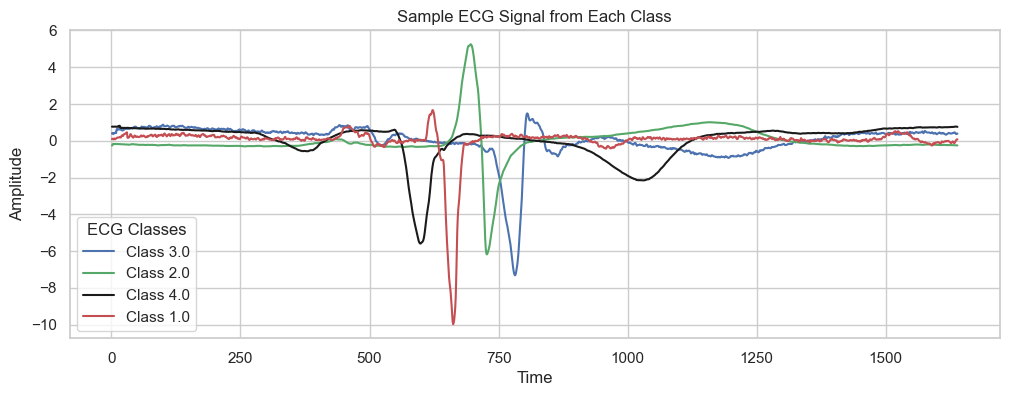

In [16]:
# Plot one sample signal from each classes
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))  

unique_classes = ecg_train_y.unique()
for class_ in unique_classes:
    sample_index = ecg_train_y[ecg_train_y == class_].index[0]
    if class_ == 1:
        plt.plot(ecg_train_x.loc[sample_index, :], label=f"Class {class_}", color="r")
    elif class_ == 2:
        plt.plot(ecg_train_x.loc[sample_index, :], label=f"Class {class_}", color="g")
    elif class_ == 3:
        plt.plot(ecg_train_x.loc[sample_index, :], label=f"Class {class_}", color="b")
    elif class_ == 4:
        plt.plot(ecg_train_x.loc[sample_index, :], label=f"Class {class_}", color="k")

plt.title("Sample ECG Signal from Each Class")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(title="ECG Classes")
plt.show()


In [11]:
# Split test dataset into 1 column for targets/classes and features
from data_preprocess import split_data

ecg_test_x, ecg_test_y = split_data(ecg_test, target_column=0, split=True)
print("Testing features:")
print(ecg_test_x.head())
print("Testing targets:")
print(ecg_test_y.head())

Testing features:
       1         2         3         4         5         6         7     \
0 -1.100900 -1.136300 -0.269700 -0.287390 -0.252010 -0.216640 -0.181270   
1  0.277960  0.293750  0.323010  0.312740  0.266580  0.233220  0.243510   
2 -0.259780 -0.257880 -0.258900 -0.248390 -0.227680 -0.229630 -0.252780   
3 -0.100410 -0.068534 -0.051683 -0.066385 -0.089782 -0.084242 -0.056820   
4  0.083505  0.079466  0.075540  0.083133  0.079600  0.061685  0.060065   

       8         9         10    ...      1630      1631     1632      1633  \
0 -0.163590 -0.092842 -0.110530  ... -0.234330 -0.252010 -0.30507 -0.393500   
1  0.256340  0.225550  0.210100  ...  0.250930  0.276540  0.28621  0.267300   
2 -0.256260 -0.256170 -0.277070  ... -0.258200 -0.259100 -0.25693 -0.239240   
3 -0.056761 -0.080574 -0.084783  ... -0.169920 -0.178470 -0.16660 -0.145190   
4  0.078609  0.095152  0.104660  ...  0.003916  0.023833  0.05540  0.079133   

       1634     1635      1636      1637      1638      